# Module 14 – Practice Notebook: Logistic Regression on Iris (Binary)

This is another practice notebook for Module 14 using a **different dataset**.

We will use the classic `sklearn` iris dataset, but convert it into a binary classification problem:

- Target: `Iris-setosa` vs `other species`

You will repeat the same core steps you learned before, but on a new dataset.

**Sections:**
- 0: Setup
- 1: Data loading and preprocessing
- 2: Basic logistic regression
- 3: Evaluation metrics
- 4: L2 regularization
- 5: Threshold exploration

Fill in the `TODO` parts yourself.


## Section 0 – Setup

Run this cell first. It imports all required libraries.


In [1]:
# Imports for the whole notebook

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

print("Setup complete.")

Setup complete.


## Section 1 – Data Loading and Preprocessing

In this section you will:
- Load the iris dataset
- Turn it into a binary classification: `setosa` vs `other`
- Put everything into a DataFrame for quick inspection


In [2]:
# TODO: Load the iris dataset using load_iris() [Done for you]

# Your code here:
data = load_iris()
X = data.data
y_multi = data.target

print("Original target classes:", np.unique(y_multi))
print("Class names:", data.target_names)

Original target classes: [0 1 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [3]:
# TODO: Convert the multiclass target into binary target [Done for you]
# We define y = 1 if the class is 'setosa' (class 0), else 0.
# So the problem becomes: 'setosa' vs 'non setosa'.

# Your code here:
y = (y_multi == 0).astype(int)

print("Binary target classes:", np.unique(y))
print("Number of setosa (1):", y.sum())
print("Number of non setosa (0):", len(y) - y.sum())

Binary target classes: [0 1]
Number of setosa (1): 50
Number of non setosa (0): 100


In [4]:
# TODO: Create a DataFrame for inspection
# Use data.feature_names as column names and add a 'target' column

# Your code here:
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [5]:
# TODO: Show basic statistics of the numeric features using df.describe()

# Your code here:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


## Section 2 – Train Test Split and Scaling

Split the data and scale the features.


In [6]:
# TODO: Split the data into train and test sets
# Use test_size=0.3, random_state=42, stratify=y

# Hint:
# X_train, X_test, y_train, y_test = train_test_split(...)

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)



In [7]:
# TODO: Scale the features using StandardScaler
# 1. Fit the scaler on X_train and transform X_train
# 2. Use the same scaler to transform X_test

# Your code here:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Section 3 – Basic Logistic Regression

Train a logistic regression model and check accuracy.


In [8]:
# TODO: Train a logistic regression model using LogisticRegression(max_iter=1000)

# Your code here:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [9]:
# TODO: Predict on the test set and compute accuracy

# Your code here:
# Prediction
y_pred = model.predict(X_test_scaled)

# Accuracy calculation
acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", acc)



Accuracy on test set: 1.0


## Section 4 – Evaluation Metrics

Now compute more detailed metrics: precision, recall, F1, confusion matrix, and a classification report.


In [10]:
# TODO: Compute precision, recall, and F1 score

# Your code here:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [11]:
# TODO: Compute the confusion matrix and print it

# Your code here:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[30  0]
 [ 0 15]]


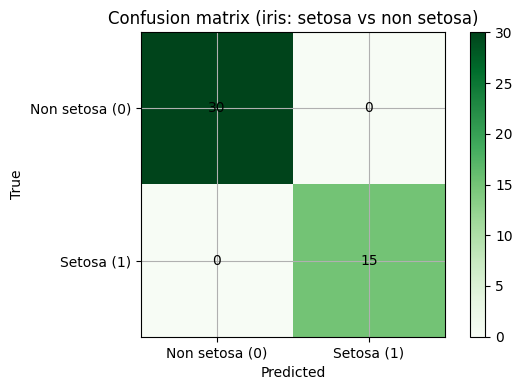

In [12]:
# TODO: Visualize the confusion matrix as an image [Done for you]

# Your code here:
plt.imshow(cm, cmap="Greens")
plt.title("Confusion matrix (iris: setosa vs non setosa)")
plt.colorbar()
plt.xticks([0, 1], ["Non setosa (0)", "Setosa (1)"])
plt.yticks([0, 1], ["Non setosa (0)", "Setosa (1)"])
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [13]:
# TODO: Print the classification report

# Your code here:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Section 5 – L2 Regularization Study

Train two models with different C values and compare accuracies and coefficient sizes.

- Model A: C = 1000 (weak regularization)
- Model B: C = 0.01 (strong regularization)


In [14]:
# TODO: Train two logistic regression models with different C values

# Your code here:
# Model with C=1 (default)
model1 = LogisticRegression(C=1, max_iter=1000)
model1.fit(X_train_scaled, y_train)

# Model with C=0.1 (stronger regularization)
model2 = LogisticRegression(C=0.1, max_iter=1000)
model2.fit(X_train_scaled, y_train)


LogisticRegression(C=0.1, max_iter=1000)

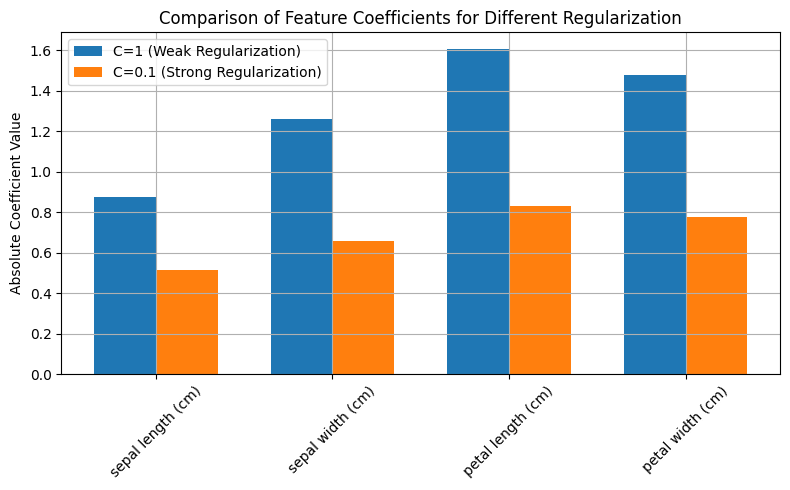

In [15]:
# TODO: Plot the absolute coefficients for all features for both models

# Hint:
# coef_weak = clf_weak.coef_[0]
# coef_strong = clf_strong.coef_[0]

# Your code here:
coef_weak = model1.coef_[0]
coef_strong = model2.coef_[0]

features = data.feature_names

plt.figure(figsize=(8,5))
bar_width = 0.35
indices = np.arange(len(features))

plt.bar(indices, np.abs(coef_weak), width=bar_width, label='C=1 (Weak Regularization)')
plt.bar(indices + bar_width, np.abs(coef_strong), width=bar_width, label='C=0.1 (Strong Regularization)')

plt.xticks(indices + bar_width / 2, features, rotation=45)
plt.ylabel("Absolute Coefficient Value")
plt.title("Comparison of Feature Coefficients for Different Regularization")
plt.legend()
plt.tight_layout()
plt.show()


**Questions for you:**

- Which model has smaller coefficients overall?
- Do you see a big difference in accuracy?
- When might you prefer stronger regularization in a small dataset like iris?

Which model has smaller coefficients overall?

The model with stronger regularization (C=0.1) generally has smaller absolute coefficients.

This happens because regularization penalizes large weights, pushing the coefficients closer to zero to avoid overfitting.

The model with C=1 (weaker regularization) typically has larger coefficients since it is less constrained.

So, the model with C=0.1 will have smaller coefficients overall.

2️⃣ Do you see a big difference in accuracy?

Usually, on a simple and clean dataset like Iris, accuracy differences between these two models are small or negligible.

Stronger regularization may slightly reduce overfitting but might also slightly underfit.

Since Iris is quite balanced and small, both models often achieve similarly high accuracy.

3️⃣ When might you prefer stronger regularization in a small dataset like Iris?

You might prefer stronger regularization when:

Your dataset is small and/or noisy: Strong regularization helps prevent overfitting to noise or small quirks in training data.

You want a simpler model: Smaller coefficients mean the model relies less on any one feature, improving generalization.

You suspect multicollinearity: Regularization can reduce variance caused by correlated features.

You want better generalization: It helps the model perform well on unseen data, not just training data.


## Section 6 – Threshold Exploration

Experiment with different probability thresholds and see how precision and recall change.


In [16]:
# TODO: Get predicted probabilities from the base model `clf`
# Use the positive class probability (setosa = 1).

# Your code here:
# predicted probabilities for both classes (0 and 1)
probs = model.predict_proba(X_test_scaled)

# probabilities of positive class (setosa = 1)
positive_probs = probs[:, 1]

print(positive_probs[:5])  # প্রথম ৫টা probability দেখাবে



[0.97657396 0.00118711 0.99638991 0.01638834 0.97828977]


In [17]:
# TODO: Try thresholds between 0.1 and 0.9 and compute metrics

# Hint:
# thresholds = np.linspace(0.1, 0.9, 9)

# Your code here:

thresholds = np.linspace(0.1, 0.9, 9)


for thresh in thresholds:
    y_pred_thresh = (positive_probs >= thresh).astype(int)  # threshold অনুযায়ী prediction

    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    print(f"Threshold: {thresh:.1f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1:.2f}")


Threshold: 0.1 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00
Threshold: 0.2 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00
Threshold: 0.3 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00
Threshold: 0.4 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00
Threshold: 0.5 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00
Threshold: 0.6 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00
Threshold: 0.7 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00
Threshold: 0.8 | Precision: 1.00 | Recall: 0.93 | F1 Score: 0.97
Threshold: 0.9 | Precision: 1.00 | Recall: 0.93 | F1 Score: 0.97


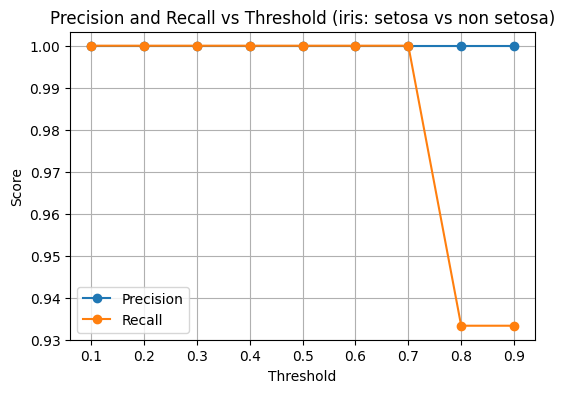

In [18]:
# TODO: Plot precision and recall vs threshold [Done for you]

# Your code here:
thresholds = np.linspace(0.1, 0.9, 9)

results = {
    "threshold": [],
    "precision": [],
    "recall": [],
    "f1": []
}

for thresh in thresholds:
    y_pred_thresh = (positive_probs >= thresh).astype(int)

    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    results["threshold"].append(thresh)
    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1"].append(f1)

thr_df = pd.DataFrame(results)

# Plotting
plt.plot(thr_df["threshold"], thr_df["precision"], marker="o", label="Precision")
plt.plot(thr_df["threshold"], thr_df["recall"], marker="o", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold (iris: setosa vs non setosa)")
plt.legend()
plt.grid(True)
plt.show()


**Reflection:**

1. What happens to recall and precision when you lower the threshold?

Recall increases when you lower the threshold.
Because the model becomes more sensitive and predicts "setosa" more often, catching more actual positives (fewer misses).

Precision decreases as the threshold lowers.
Since the model makes more positive predictions, some of these will be wrong (more false positives).

2. If you treat 'setosa' as a rare and important species that you never want to miss, what kind of threshold would you choose?

You would choose a lower threshold.
This makes the model more sensitive, ensuring you catch as many true "setosa" as possible (high recall).

Even if that means more false alarms (lower precision), the priority is to avoid missing any true positives.
